In [1]:
# Read crimes.csv
import dask.dataframe as dd
import pandas as pd
import numpy as np
#!pip install dask[dataframe]
#!pip install pandas --upgrade
data_types = {
    'ID':  np.int64,
    'Case Number':  object,
    'Date': object,
    'Block': object,
    'IUCR': object,
    'Primary Type': object,
    'Description':  object,
    'Location Description': object,
    'Arrest':  bool,
    'Domestic': bool,
    'Beat': np.int64,
    'District': np.float64,
    'Ward': np.float64,
    'Community Area': np.float64,
    'FBI Code': object,
    'X Coordinate': np.float64,
    'Y Coordinate': np.float64,
    'Year': np.int64,
    'Updated On': object,
    'Latitude': np.float64,
    'Longitude': np.float64,
    'Location': object
}
df = pd.read_csv('crimes.csv')

In [2]:
# only use [2008,2012)
df.sort_values(['Year'], ascending=True)
data08_12 = df[df.Year.isin(range(2008, 2012))]

In [72]:
# read socioeconomic data; merge with crimes
poverty = pd.read_csv('poverty.csv')
crimes_with_soc = pd.merge(data08_12, poverty, how='left', left_on='Community Area', right_on='Community Area Number')
crimes_with_soc.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,8677678,HV351159,06/02/2010 09:00:00 AM,086XX W FOSTER AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,"(41.973771478, -87.842226779)",76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24
1,8678050,HV349526,06/27/2011 12:44:00 PM,002XX W MADISON ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,False,...,"(41.881944424, -87.634195294)",32,Loop,1.5,14.7,5.7,3.1,13.5,65526,3
2,8678122,HV353372,12/11/2011 02:00:00 PM,052XX N MOODY AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,False,False,...,"(41.976282262, -87.782332131)",11,Jefferson Park,2.7,8.6,12.4,13.4,35.5,27751,25
3,8678213,HV353504,08/12/2011 12:00:00 PM,112XX S WALLACE ST,0810,THEFT,OVER $500,"SCHOOL, PUBLIC, BUILDING",False,False,...,"(41.68995741, -87.637460623)",49,Roseland,2.5,19.8,20.3,16.9,41.2,17949,52
4,8678564,HV353442,12/07/2011 08:00:00 AM,039XX W 79TH ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,...,"(41.749460005, -87.72089612)",70,Ashburn,4.0,10.4,11.7,17.7,36.9,23482,37


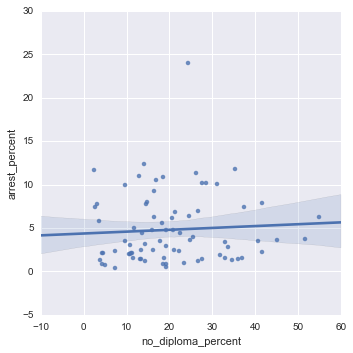

In [78]:
# Arrests v diplomas
%matplotlib inline
from __future__ import division
import seaborn as sns
total_arrests = crimes_with_soc['Arrest'].sum()
arrest_percent = crimes_with_soc.groupby('Community Area').Arrest.count()/total_arrests*100
crimes_with_soc.rename(columns = {'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'PercentNoDiploma'}, inplace = True)
no_diploma_percent = crimes_with_soc.groupby('Community Area').PercentNoDiploma.mean()
df = pd.DataFrame({'arrest_percent':arrest_percent,'no_diploma_percent':no_diploma_percent,}).dropna()
sns.lmplot('no_diploma_percent','arrest_percent', df)

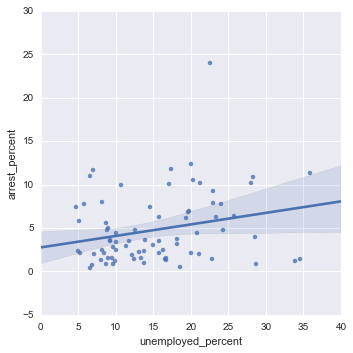

In [77]:
# Arrests v unemployed
total_arrests = crimes_with_soc['Arrest'].sum()
arrest_percent = crimes_with_soc.groupby('Community Area').Arrest.count()/total_arrests*100
crimes_with_soc.rename(columns = {'PERCENT AGED 16+ UNEMPLOYED':'PercentUnemployed'}, inplace = True)
unemployed_percent = crimes_with_soc.groupby('Community Area').PercentUnemployed.mean()
df = pd.DataFrame({'arrest_percent':arrest_percent,'unemployed_percent':unemployed_percent,}).dropna()
sns.lmplot('unemployed_percent','arrest_percent', df)